## Everything in one Set

Change your models in their definition and run the test

In [2]:
from neuron import h, gui
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp, phase, ih
from cells.hallermann2012 import iteration3

reload(iteration3)
config = iteration3.Config()

def Sham():
    config = iteration3.Config()
    config.celsius = 37
    return iteration3.SPI6(config)


cellbuilder = Sham
cell = cellbuilder()


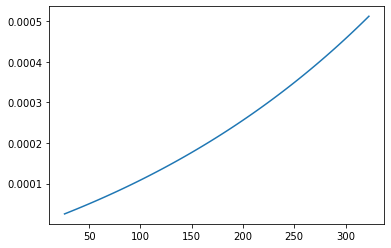

In [4]:

import matplotlib.pyplot as plt

plt.plot(cell.c.distributions["d_basal"],cell.c.distributions["ih_basal"])

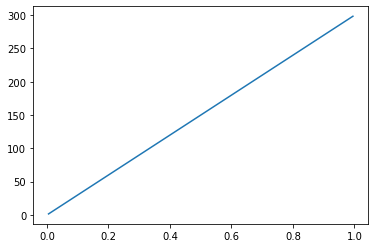

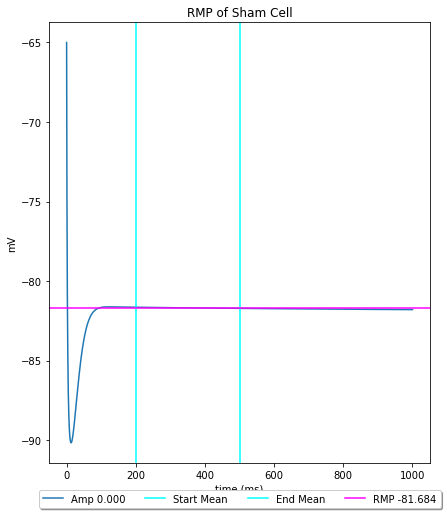

In [ ]:
rmp.calculateRMP(cellbuilder, plot=True)
generic.calculateInputResistance(cellbuilder, mult=-0.025, iterations=8, plot=True, delay=300, duration=500)
undertrace, overtrace = rheobase.calculateRheobase(cellbuilder, precisiondigits=2, plot=True)

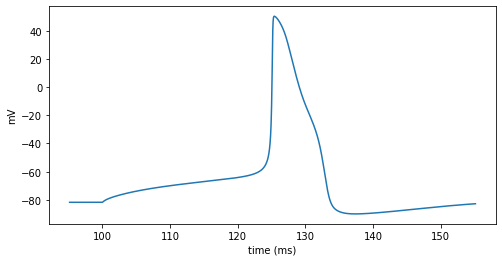

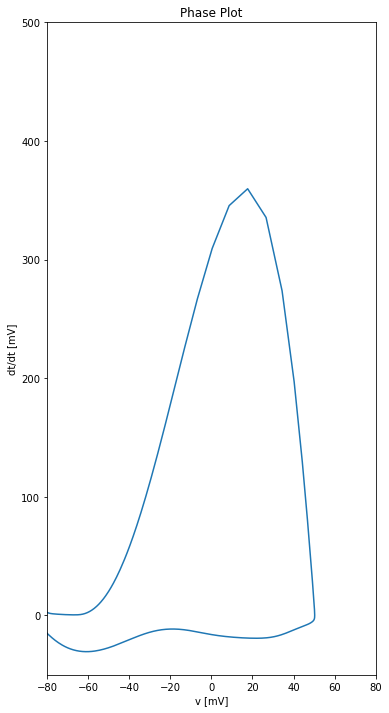

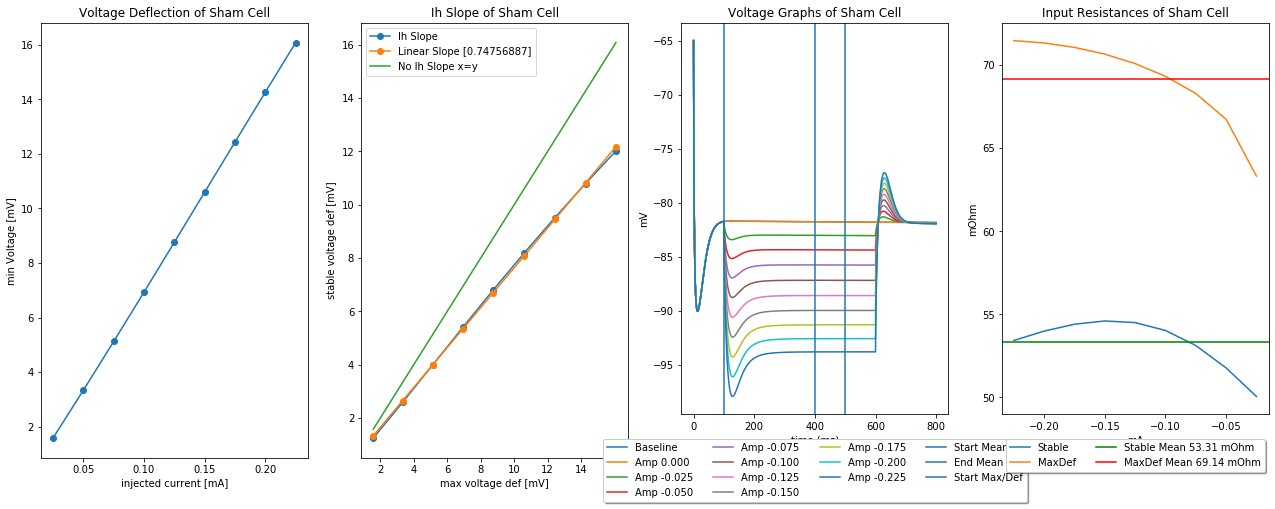

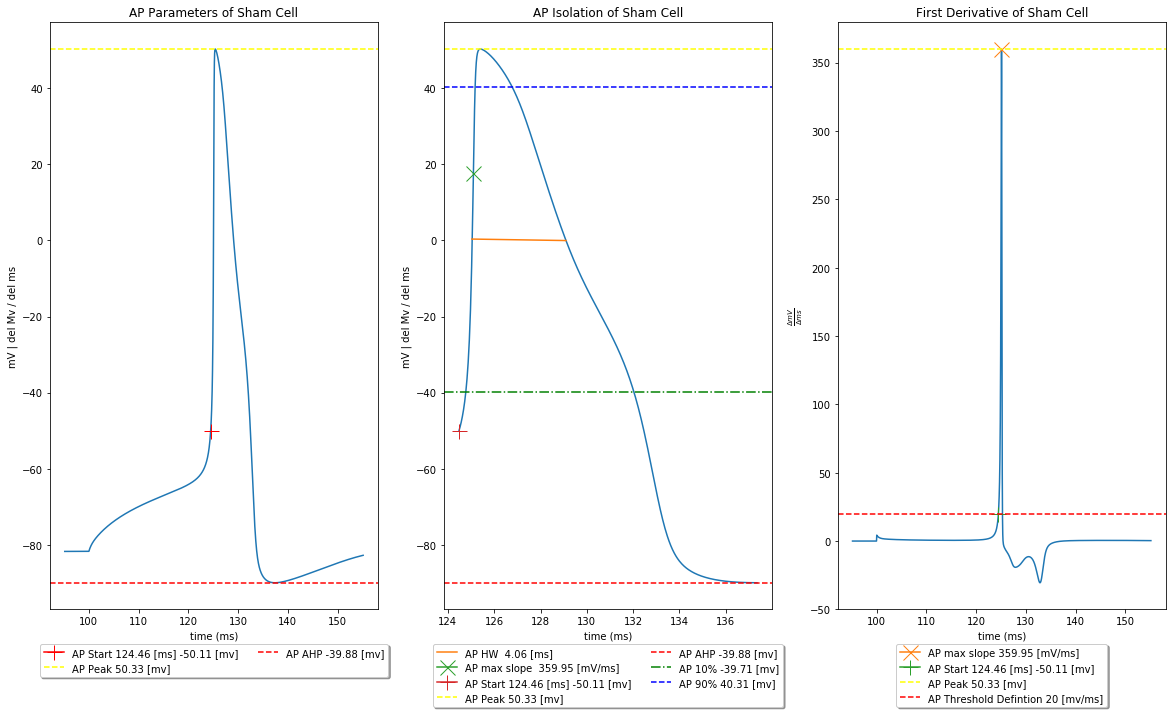

In [3]:


#foundtrace = ap.findFirstApWithinMS(cellbuilder, ms= 15) #is for the approach to get the first ap within ms
aptime = overtrace["aps"][0]
aptrace = generic.isolateTime(overtrace, aptime,30)

generic.plotTrace(aptrace)
phase.phasePlanePlot(aptrace)

ih.calculateInputResistanceAndIhSag(cellbuilder)
aptracewithparams = ap.calculateAPThresholdAndDerivative(aptrace)
ap.plotApParameters(aptracewithparams, deriv=True)